In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# -----------------------------------
# 学習データ、テストデータの読み込み
# -----------------------------------
# 学習データ、テストデータの読み込み
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [24]:
# 学習データを特徴量と目的変数に分ける
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']

# テストデータは特徴量のみなので、そのままでよい
test_x = test.copy()

feature_importances_の値が小さいカラムは削除する

In [25]:
# -----------------------------------
# 特徴量作成
# -----------------------------------
from sklearn.preprocessing import LabelEncoder

# 変数PassengerIdを除外する
train_x = train_x.drop(['PassengerId'], axis=1)
test_x = test_x.drop(['PassengerId'], axis=1)

# 変数Initialを追加する
train_x['Initial']=0
test_x['Initial']=0
for i in train_x:
    train_x['Initial']=train_x.Name.str.extract('([A-Za-z]+)\.')
for i in test_x:
    test_x['Initial']=test_x.Name.str.extract('([A-Za-z]+)\.')

# 年齢の欠損値を欠損していない年齢の中央値で補完します。
train_x["Age"] = train_x["Age"].fillna(train_x["Age"].median())
test_x["Age"] = test_x["Age"].fillna(test_x["Age"].median())

# 変数isMrを追加する
train_x['isMr']=0
test_x['isMr']=0
for i in range(len(train_x)):
    if train_x.at[i, 'Initial'] == 'Mr':
        train_x.at[i, 'isMr'] = 1
    else:
        train_x.at[i, 'isMr'] = 0
for i in range(len(test_x)):
    if test_x.at[i, 'Initial'] == 'Mr':
        test_x.at[i, 'isMr'] = 1
    else:
        test_x.at[i, 'isMr'] = 0

## 変数isMrsを追加する
#train_x['isMrs']=0
#test_x['isMrs']=0
#for i in range(len(train_x)):
#    if train_x.at[i, 'Initial'] == 'Mrs':
#        train_x.at[i, 'isMrs'] = 1
#    else:
#        train_x.at[i, 'isMrs'] = 0
#for i in range(len(test_x)):
#    if test_x.at[i, 'Initial'] == 'Mrs':
#        test_x.at[i, 'isMrs'] = 1
#    else:
#        test_x.at[i, 'isMrs'] = 0

## 変数isMissを追加する
#train_x['isMiss']=0
#test_x['isMiss']=0
#for i in range(len(train_x)):
#    if train_x.at[i, 'Initial'] == 'Miss':
#        train_x.at[i, 'isMiss'] = 1
#    else:
#        train_x.at[i, 'isMiss'] = 0
#for i in range(len(test_x)):
#    if test_x.at[i, 'Initial'] == 'Miss':
#        test_x.at[i, 'isMiss'] = 1
#    else:
#        test_x.at[i, 'isMiss'] = 0
        
# 変数isMasterを追加する
train_x['isMaster']=0
test_x['isMaster']=0
for i in range(len(train_x)):
    if train_x.at[i, 'Initial'] == 'Master':
        train_x.at[i, 'isMaster'] = 1
    else:
        train_x.at[i, 'isMaster'] = 0
for i in range(len(test_x)):
    if test_x.at[i, 'Initial'] == 'Master':
        test_x.at[i, 'isMaster'] = 1
    else:
        test_x.at[i, 'isMaster'] = 0

# 変数Ticketを置換する
train_x['Ticket'] = train_x['Ticket'].replace('LINE','LINE 0')
test_x['Ticket'] = test_x['Ticket'].replace('LINE','LINE 0')
train_x['Ticket'] = train_x['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
def get_prefix(ticket):
    lead = ticket.split(' ')[0][0]
    if lead.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'NoPrefix'
test_x['Ticket'] = test_x['Ticket'].apply(lambda x: x.replace('.','').replace('/','').lower())
def get_prefix(ticket):
    lead = ticket.split(' ')[0][0]
    if lead.isalpha():
        return ticket.split(' ')[0]
    else:
        return 'NoPrefix'

# 変数TNumericを追加する
train_x['TNumeric'] = train_x['Ticket'].apply(lambda x: int(x.split(' ')[-1])//1)
test_x['TNumeric'] = test_x['Ticket'].apply(lambda x: int(x.split(' ')[-1])//1)

## 変数TNlenを追加する
#train_x['TNlen'] = train_x['TNumeric'].apply(lambda x : len(str(x)))
#test_x['TNlen'] = test_x['TNumeric'].apply(lambda x : len(str(x)))

# 変数LeadingDigitを追加する
train_x['LeadingDigit'] = train_x['TNumeric'].apply(lambda x : int(str(x)[0]))
test_x['LeadingDigit'] = test_x['TNumeric'].apply(lambda x : int(str(x)[0]))

# 変数Deckを追加する
train_x['Deck']=0
test_x['Deck']=0
for i in train_x:
    train_x['Deck']=train_x["Cabin"].str.slice(0,1)
for i in test_x:
    test_x['Deck']=test_x["Cabin"].str.slice(0,1)

## 変数isDeckを追加する
#train_x['isDeck']=0
#test_x['isDeck']=0
#for i in range(len(train_x)):
#    if train_x.at[i, 'Sex'] == 'female':
#        if train_x.at[i, 'Deck'] == 'B' or 'C' or 'D' or 'E':
#            train_x.at[i, 'isDeck'] = 1
#        else:
#            train_x.at[i, 'isDeck'] = 0
#for i in range(len(test_x)):
#    if test_x.at[i, 'Sex'] == 'female':
#        if test_x.at[i, 'Deck'] == 'B' or 'C' or 'D' or 'E':
#            test_x.at[i, 'isDeck'] = 1
#        else:
#            test_x.at[i, 'isDeck'] = 0

# 変数Name, Parch, Ticket, Cabinを除外する
train_x = train_x.drop(['Name', 'Parch', 'Ticket', 'Cabin'], axis=1)
test_x = test_x.drop(['Name', 'Parch', 'Ticket', 'Cabin'], axis=1)

In [26]:
# テストデータにのみ存在するDonaをMissに置換する
test_x.at[414, 'Initial'] = 'Miss'

In [27]:
# テストデータにのみ存在する欠損値を中央値で補完します。
test_x["Fare"] = test_x["Fare"].fillna(test_x["Fare"].median())

In [28]:
# それぞれのカテゴリ変数にlabel encodingを適用する
for c in ['Sex', 'Embarked', 'Initial', 'Deck']:
    # 学習データに基づいてどう変換するかを定める
    le = LabelEncoder()
    le.fit(train_x[c].fillna('NA'))

    # 学習データ、テストデータを変換する
    train_x[c] = le.transform(train_x[c].fillna('NA'))
    test_x[c] = le.transform(test_x[c].fillna('NA'))

In [29]:
# -----------------------------------
# モデル作成
# -----------------------------------
#import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier as RandomForest

In [30]:
# -----------------------------------
# バリデーション
# -----------------------------------
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold

# 各foldのスコアを保存するリスト
scores_accuracy = []
scores_logloss = []

# StratifideKFoldクラスを用いて層化抽出による分割を行う
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x, train_y):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    #model = xgb.DMatrix(n_estimators=20, random_state=71)
    model = RandomForest(n_estimators=100)
    model.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = model.predict_proba(va_x)[:, 1]
    
    # バリデーションデータでのスコアを計算する
    logloss = log_loss(va_y, va_pred)
    accuracy = accuracy_score(va_y,va_pred > 0.5) 
    
    # そのfoldスコアを保存する
    scores_logloss.append(logloss)
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
logloss = np.mean(scores_logloss)
accuracy = np.mean(scores_accuracy)
print(f'logloss: {logloss:.4f}, accuracy: {accuracy:.4f}')

logloss: 0.6207, accuracy: 0.8463


In [31]:
# モデルの作成および学習データを与えての学習
model = RandomForest(n_estimators=100)
model.fit(train_x, train_y)

# テストデータの予測値を確率で出力する
pred = model.predict_proba(train_x)[:, 1]

# テストデータの予測値を二値に変換する
pred_label = np.where(pred > 0.5, 1, 0)


<BarContainer object of 12 artists>

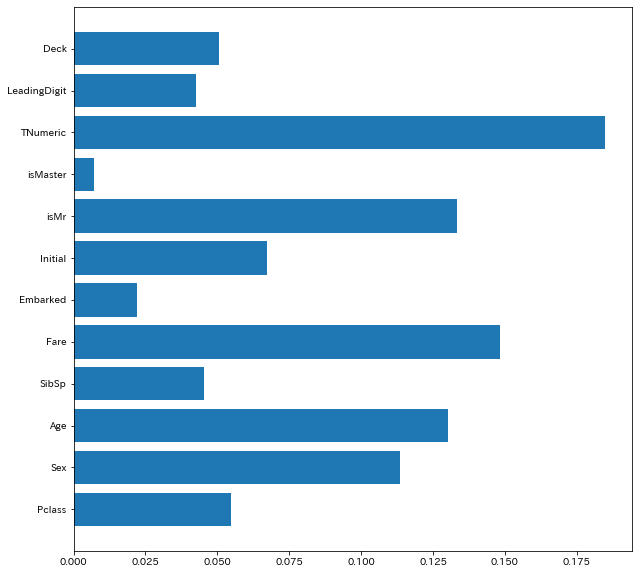

In [32]:
features =train_x.columns[train_x.any()]
fscore = model.feature_importances_   
plt.figure(figsize=(10,10))
plt.barh(features,fscore)

In [33]:
# テストデータの予測値を確率で出力する
pred = model.predict_proba(test_x)[:, 1]

# テストデータの予測値を二値に変換する
pred_label = np.where(pred > 0.5, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_label})
submission.to_csv('../output/submission_first.csv', index=False)